In [190]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import itertools

## EDA

In [191]:
pwd

'/home/serj/Desktop/PML/pml-2022-smart'

In [192]:
!ls 

 139_features_per_axis		   train_labels_map.pickle
 1_EDA.ipynb			  'Try Classifier training.ipynb'
 2_Create_Array_Embeddings.ipynb   X_train_139.npy
 sample_submission.csv		   X_train_9.npy
 test				   y_train_139.npy
 train				   y_train_9.npy
 train_labels.csv


In [193]:
train_files = os.listdir('train/train/')
train_files.sort()
print(len(test_files), train_files[:5])

5000 ['10003.csv', '10005.csv', '10006.csv', '10007.csv', '10012.csv']


In [194]:
colnames = ['x', 'y', 'z']

In [195]:
## Let's play around with the features in the first file
df = pd.read_csv('train/train/16091.csv', names=colnames)
df.head()

,x,y,z
0,-1.322198,5.557541,8.197746
1,-1.308431,5.543176,8.437765
2,-1.283292,5.506664,8.547300
3,-1.389236,5.506664,8.495226
4,-1.528099,5.507861,8.396465


In [196]:
df.shape

(153, 3)

In [197]:
x = df['x'].tolist()
y = df['y'].tolist()
z = df['z'].tolist()

row = list(itertools.chain(x,y,z))

In [198]:
print(len(row))

459


In [199]:
# Compute mean, std, variance of array
print(np.mean(x), np.std(x), np.var(x))
print(np.mean(y), np.std(y), np.var(y))
print(np.mean(z), np.std(z), np.var(z))

-0.0033878954248365988 0.9795745172897266 0.9595662349234008
5.146461745098039 0.6145534845928886 0.37767598542526176
8.270695418300654 0.4743253508813618 0.224984538488727


In [200]:
features = ['x', 'y', 'z', 'out']
feature_df = pd.DataFrame(columns=features)
feature_df.head()

,x,y,z,out


In [201]:
row = {'x': x, 'y': y, 'z': z, 'out': '16091'}
feature_df = feature_df.append(row, ignore_index=True)
feature_df.head()

,x,y,z,out
0,"[-1.322198, -1.308431, -1.283292, -1.389236000...","[5.5575410000000005, 5.543176, 5.506664, 5.506...","[8.197746, 8.437764999999999, 8.5473, 8.495225...",16091


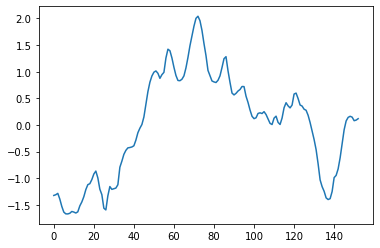

In [202]:
plt.plot(x)
plt.show()

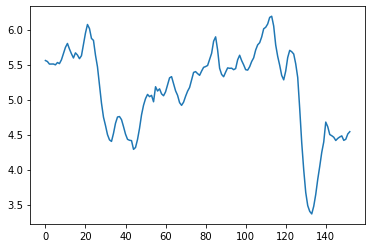

In [203]:
plt.plot(y)

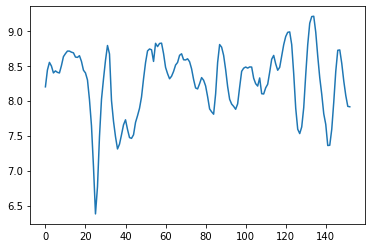

In [204]:
plt.plot(z)

In [205]:
feature_df['x'][0]

[-1.322198,
 -1.308431,
 -1.283292,
 -1.3892360000000001,
 -1.5280989999999999,
 -1.634641,
 -1.667561,
 -1.668759,
 -1.6567880000000001,
 -1.62267,
 -1.6340430000000001,
 -1.6519990000000002,
 -1.629254,
 -1.517924,
 -1.444302,
 -1.3455409999999999,
 -1.212065,
 -1.119888,
 -1.101333,
 -1.024718,
 -0.9199719999999999,
 -0.8649049999999999,
 -0.9929950000000001,
 -1.204882,
 -1.3066360000000001,
 -1.56102,
 -1.59394,
 -1.329381,
 -1.155202,
 -1.207875,
 -1.1953049999999998,
 -1.183933,
 -1.121085,
 -0.792481,
 -0.678756,
 -0.550666,
 -0.47584799999999994,
 -0.42916099999999996,
 -0.42257700000000004,
 -0.412401,
 -0.389656,
 -0.283713,
 -0.144849,
 -0.059855,
 0.008978,
 0.150835,
 0.39264899999999997,
 0.6254850000000001,
 0.803255,
 0.9199719999999999,
 0.9912,
 1.014543,
 0.97025,
 0.8756790000000001,
 0.9445129999999999,
 0.988207,
 1.256956,
 1.422754,
 1.393425,
 1.257554,
 1.082778,
 0.930147,
 0.835576,
 0.8313870000000001,
 0.8589200000000001,
 0.922366,
 1.071405,
 1.267131,


## Create Train Labels mapping dict

In [206]:
# train_labels = pd.read_csv('train_labels.csv')
# print(train_labels['id'].dtype, train_labels['class'].dtype)
# train_labels.head()

In [207]:
# train_labels_map = {}
# ids = train_labels['id'].tolist()
# cls = train_labels['class'].tolist()

# for i, c in zip(ids, cls):
#     train_labels_map[int(i)] = int(c)
# list(train_labels_map.items())[:5]

### Save it as pkl

In [208]:
# with open('train_labels_map.pickle', 'wb') as handle:
#     pickle.dump(train_labels_map, handle)

### Read it as pkl

In [209]:
with open('train_labels_map.pickle', 'rb') as handle:
    train_labels_map = pickle.load(handle)
list(train_labels_map.items())[:5]

[(10003, 7), (10005, 13), (10006, 6), (10007, 1), (10012, 1)]

### Receive filename and output the number

In [210]:
def map_file_to_label(filename: str) -> int:
    name, csv = filename.split('.')
    return int(name)

In [211]:
map_file_to_label('16091.csv')

16091

## Let's create a DataFrame of all x,y,z,output features

In [214]:
train_files = os.listdir('train/train/')
train_files.sort()
train_files[:5]
# ['10003.csv', '10005.csv', '10006.csv', '10007.csv', '10012.csv']...

# Declare dataframe
# features = ['x', 'y', 'z', 'label']
# df = pd.DataFrame(columns=features)
# df.head()

['10003.csv', '10005.csv', '10006.csv', '10007.csv', '10012.csv']

In [117]:
# Freqency of array lengths

# from collections import defaultdict
# freq = defaultdict(int)

# """
# defaultdict(int,
#             {150: 5973,
#              149: 1561,
#              151: 951,
#              152: 135,
#              148: 215,
#              153: 38,
#              147: 63,
#              145: 12,
#              154: 13,
#              155: 1,
#              146: 22,
#              144: 5,
#              140: 1,
#              143: 4,
#              141: 1,
#              139: 2,
#              142: 2,
#              156: 1})
# """
# minimum is 139

# Create X_train and y_train

In [215]:
colnames = ['x', 'y', 'z']
N = 9000
features = 139 * 3
X_train = np.zeros((N, features))
labels = []

for i, file in enumerate(train_files[:N]):
    
    full_path = f'train/train/{file}'
    temp_df = pd.read_csv(full_path, names=colnames)
    index = map_file_to_label(file)
    labels.append(train_labels_map[index])
    
    x = temp_df['x'].to_numpy()[:139]
    y = temp_df['y'].to_numpy()[:139]
    z = temp_df['z'].to_numpy()[:139]
    print(f'File {file}; len_x: {len(x)}, len_y: {len(y)}, len_z: {len(z)}')
    
    X_train[i] = np.array(list(itertools.chain(x, y, z)))



File 10003.csv; len_x: 139, len_y: 139, len_z: 139
File 10005.csv; len_x: 139, len_y: 139, len_z: 139
File 10006.csv; len_x: 139, len_y: 139, len_z: 139
File 10007.csv; len_x: 139, len_y: 139, len_z: 139
File 10012.csv; len_x: 139, len_y: 139, len_z: 139
File 10013.csv; len_x: 139, len_y: 139, len_z: 139
File 10014.csv; len_x: 139, len_y: 139, len_z: 139
File 10016.csv; len_x: 139, len_y: 139, len_z: 139
File 10017.csv; len_x: 139, len_y: 139, len_z: 139
File 10018.csv; len_x: 139, len_y: 139, len_z: 139
File 10019.csv; len_x: 139, len_y: 139, len_z: 139
File 10020.csv; len_x: 139, len_y: 139, len_z: 139
File 10021.csv; len_x: 139, len_y: 139, len_z: 139
File 10022.csv; len_x: 139, len_y: 139, len_z: 139
File 10024.csv; len_x: 139, len_y: 139, len_z: 139
File 10025.csv; len_x: 139, len_y: 139, len_z: 139
File 10026.csv; len_x: 139, len_y: 139, len_z: 139
File 10028.csv; len_x: 139, len_y: 139, len_z: 139
File 10029.csv; len_x: 139, len_y: 139, len_z: 139
File 10030.csv; len_x: 139, len

In [216]:
X_train

array([[-0.767342, -0.826   , -0.819415, ...,  7.796718,  7.776966,
         7.876924],
       [-1.105523, -1.020528, -0.965462, ...,  9.086594,  9.029732,
         8.874108],
       [-0.226252, -0.229245, -0.232836, ...,  7.251439,  7.259818,
         7.328053],
       ...,
       [ 0.821211,  0.562039,  0.484227, ...,  8.597578,  8.637681,
         9.003994],
       [ 0.604536,  0.350152,  0.344166, ...,  6.500856,  6.757634,
         7.347805],
       [-0.60274 , -0.545279, -0.478242, ...,  7.693767,  7.503428,
         7.226299]])

In [217]:
X_train
X_train.shape

(9000, 417)

In [218]:
labels[:5]

[7, 13, 6, 1, 1]

In [220]:
# Save X_train
with open('X_train_139.npy', 'wb') as f:
    np.save(f, X_train)

In [221]:
# Load X_train
with open('X_train_139.npy', 'rb') as f:
    X_train = np.load(f)
X_train.shape

(9000, 417)

In [179]:
X_train

array([[-0.767342, -0.826   , -0.819415, ...,  7.796718,  7.776966,
         7.876924],
       [-1.105523, -1.020528, -0.965462, ...,  9.086594,  9.029732,
         8.874108],
       [-0.226252, -0.229245, -0.232836, ...,  7.251439,  7.259818,
         7.328053],
       ...,
       [ 0.821211,  0.562039,  0.484227, ...,  8.597578,  8.637681,
         9.003994],
       [ 0.604536,  0.350152,  0.344166, ...,  6.500856,  6.757634,
         7.347805],
       [-0.60274 , -0.545279, -0.478242, ...,  7.693767,  7.503428,
         7.226299]])

In [222]:
# Save y_train
with open('y_train_139.npy', 'wb') as f:
    np.save(f, labels)

In [223]:
# Load y_train
with open('y_train_139.npy', 'rb') as f:
    y_train = np.load(f)
y_train.shape

(9000,)

In [224]:
y_train

array([ 7, 13,  6, ...,  3,  3, 18])

# Create X_test

In [232]:
test_files = os.listdir('test/test/')
test_files.sort()
print(test_files[:5], len(test_files))

['10001.csv', '10002.csv', '10004.csv', '10008.csv', '10009.csv'] 5000


# BUG !

In [233]:
colnames = ['x', 'y', 'z']
N = 5000
features = 139 * 3
X_test = np.zeros((N, features))
test_labels = []

for i, file in enumerate(test_files[:N]):
    
    full_path = f'test/test/{file}'
    temp_df = pd.read_csv(full_path, names=colnames)
    test_labels.append(int(map_file_to_label(file)))
    
    x = temp_df['x'].to_numpy()[:139]
    y = temp_df['y'].to_numpy()[:139]
    z = temp_df['z'].to_numpy()[:139]
    print(f'File {file}; len_x: {len(x)}, len_y: {len(y)}, len_z: {len(z)}')
    row = list(itertools.chain(x, y, z))
    X_test[i][0:min(len(x) * 3, 139 * 3)] = np.array(row)

File 10001.csv; len_x: 139, len_y: 139, len_z: 139
File 10002.csv; len_x: 139, len_y: 139, len_z: 139
File 10004.csv; len_x: 139, len_y: 139, len_z: 139
File 10008.csv; len_x: 139, len_y: 139, len_z: 139
File 10009.csv; len_x: 139, len_y: 139, len_z: 139
File 10010.csv; len_x: 139, len_y: 139, len_z: 139
File 10011.csv; len_x: 139, len_y: 139, len_z: 139
File 10015.csv; len_x: 139, len_y: 139, len_z: 139
File 10023.csv; len_x: 139, len_y: 139, len_z: 139
File 10027.csv; len_x: 139, len_y: 139, len_z: 139
File 10032.csv; len_x: 139, len_y: 139, len_z: 139
File 10034.csv; len_x: 139, len_y: 139, len_z: 139
File 10035.csv; len_x: 139, len_y: 139, len_z: 139
File 10040.csv; len_x: 139, len_y: 139, len_z: 139
File 10041.csv; len_x: 139, len_y: 139, len_z: 139
File 10043.csv; len_x: 139, len_y: 139, len_z: 139
File 10044.csv; len_x: 139, len_y: 139, len_z: 139
File 10045.csv; len_x: 139, len_y: 139, len_z: 139
File 10048.csv; len_x: 139, len_y: 139, len_z: 139
File 10051.csv; len_x: 139, len

In [227]:
X_test

array([[-0.320224, -0.228646, -0.15682 , ...,  8.753201,  8.729259,
         8.35337 ],
       [-0.654216, -0.359729, -0.310648, ...,  7.900267,  7.829638,
         7.791331],
       [-0.563835, -0.569221, -0.526724, ...,  8.887277,  8.819042,
         8.775348],
       ...,
       [ 0.283713,  0.331597,  0.438737, ...,  7.186795,  7.174225,
         7.202357],
       [-1.40779 , -1.360505, -1.316212, ...,  8.737639,  8.888473,
         8.959103],
       [-0.0413  ,  0.180164,  0.155025, ...,  7.959524,  7.982268,
         8.090606]])

In [228]:
X_test.shape

(5000, 417)

In [229]:
# Save X_test
with open('X_test_139.npy', 'wb') as f:
    np.save(f, X_test)

In [230]:
# Load X_test
with open('X_test_139.npy', 'rb') as f:
    X_test = np.load(f)
X_test.shape

(5000, 417)

In [235]:
# Save test_label_sorted_list
print(test_labels[:5])
# Save X_test
with open('test_labels_sorted.npy', 'wb') as f:
    np.save(f, test_labels)

[10001, 10002, 10004, 10008, 10009]


In [236]:
# Load test_label_sorted_list
with open('test_labels_sorted.npy', 'rb') as f:
    test_labels = np.load(f)
len(test_labels)

5000